# Urban Farming in Milan, Italy
# Problem Statement


1. Identify Crops suitable for Urban farming inlcuing environmental, climatic conditions in urban areas.

2. Develop an algorithm that takes into account the environmental conditions, location, and available infrastructure to predict the potential growth of crops in urban areas. The algorithm should analyze facltors such as sunlight exposure, soil quality, water availability, and temperature to determine the most suitable crops for a specific urban farming site.

3. Address the risks associated with urban farming to ensure a successful and sustainable operation. Minimise potential risks related to urban agriculture, social and economic risks, including health risks from wastewater irrigation, trace metal, zoonotic risks, and other health risks. By identifying and mitigating these risks, we can suggest solutions to potential urban farmers to create a safe and productive environment for growing crops in urban settings.


# Data Collection
Data is collected from different sources for few vegetables, salads and fruits and synthetic data is generated considering the following features

Name
Min_temp(C)
Max_temp(C)
Rainfall(mm) Min
Rainfall(mm) Max
Ph(Min)
pH(Max)
Soil_Type
Fertility
Light_Hours(Min)
Light_Hours(Max)
Light_intensity(Min) (μmol·m−2·s−1)
Light_intensity(Max)(μmol·m−2·s−1)
Relative Humidity (%)
N-P-K Ratio
Season	      
Yield (100g/ha)


# Data Understanding and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import cm


#mount Gdrive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# reading the latest updated dataset into a dataframe for futher analysis
df=pd.read_csv("/content/drive/MyDrive/MachineLearningProjects/AgritechMilano/synthetic_salads_normal_crop_data.csv")

# Drop the first column Serial No.
df.drop('S. no.', axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1000 non-null   object 
 1   Soil_Type        1000 non-null   object 
 2   Fertility        1000 non-null   object 
 3   Photoperiod      1000 non-null   object 
 4   N-P-K Ratio      1000 non-null   object 
 5   Temperature      1000 non-null   float64
 6   Rainfall         1000 non-null   float64
 7   pH               1000 non-null   float64
 8   Light_Hours      1000 non-null   float64
 9   Light_Intensity  1000 non-null   float64
 10  Rh               1000 non-null   float64
 11  Yield            1000 non-null   float64
 12  Season           1000 non-null   object 
dtypes: float64(7), object(6)
memory usage: 101.7+ KB


In [ ]:
df.shape


(1000, 13)



*   There are 1000 datapoints/rows and 13 features
*   Its observed that there are no null values/ missing values in the dataset
*   Among the features, the below features have Categorical values
      * Name
      * Soil_Type      
      * Fertility         
      * Photoperiod    
      * N-P-K Ratio
      * Season  



*   List item





In [ ]:
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
print(df_unique)


           Variable  DistinctCount
0              Name             10
1         Soil_Type              9
2         Fertility              2
3       Photoperiod              3
4       N-P-K Ratio              8
5       Temperature           1000
6          Rainfall           1000
7                pH           1000
8       Light_Hours           1000
9   Light_Intensity           1000
10               Rh           1000
11            Yield           1000
12           Season              8


In [ ]:
# Get numerical and categorical columns
# Display the count of unique values for Categorical Columns

# Remove leading and trailing spaces for values in Season column
df['Season'] = df['Season'].str.strip()

df_ = df.select_dtypes(exclude=['int', 'float'])
print('Categorical Columns:')
print()
for col in df_.columns:
    print(df_[col].value_counts()) # to print count of every category
    print("\n")

Categorical Columns:

Name
Arugula      100
Beet         100
Cabbage      100
Chard        100
Cress        100
Endive       100
Kale         100
Lettuce      100
Radicchio    100
Spinach      100
Name: count, dtype: int64


Soil_Type
Loose fertile loams, and muck soilsÂ                         200
sandy loam soils                                             100
sandy to heavy soils                                         100
rich, moisture-retentive, free-draining soil.                100
Loamy, well-draining, nutrient-rich soil                     100
Loose fertile loams                                          100
best in loamy, well-drained soil with high organic matter    100
Sandy peats and mucks, deep black sandy loams and loams      100
well-drained soil rich in organic matter                     100
Name: count, dtype: int64


Fertility
High        700
Moderate    300
Name: count, dtype: int64


Photoperiod
Short Day Period, Day Neutral    700
Short Day Period                 

# Descriptive Statistics

In [ ]:
df.describe().T.round(decimals=2)


,count,mean,std,min,25%,50%,75%,max
Temperature,1000.0,18.96,2.41,8.15,17.26,18.86,20.51,28.00
Rainfall,1000.0,1045.11,417.49,503.88,711.42,901.15,1257.64,2478.15
pH,1000.0,6.67,0.49,5.34,6.43,6.64,6.95,7.95
Light_Hours,1000.0,11.01,2.57,5.42,9.92,11.49,13.02,15.65
Light_Intensity,1000.0,293.71,241.10,71.87,125.12,231.87,309.73,972.09
Rh,1000.0,63.12,22.53,29.74,45.79,54.80,92.86,99.72
Yield,1000.0,18.51,14.49,1.03,7.00,18.35,22.46,64.36


# Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 60.0% of the points cannot be plac

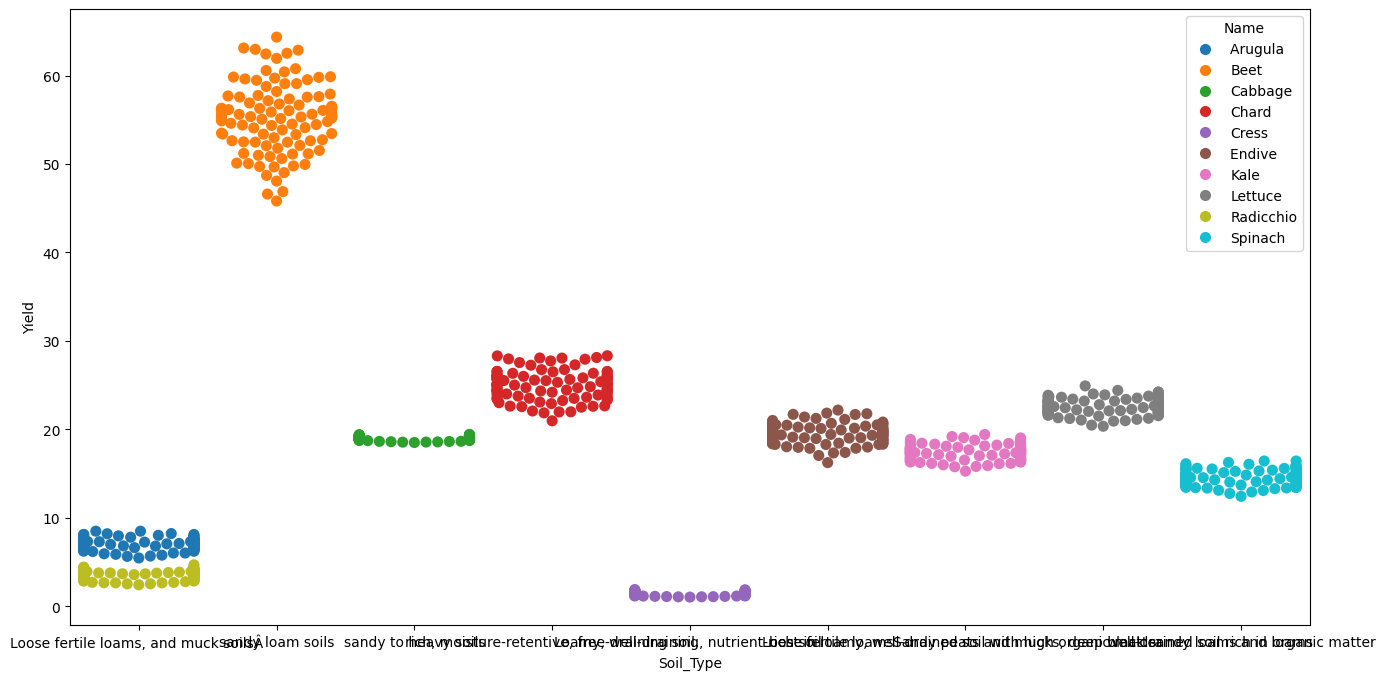

In [ ]:
# Understand the distribution of numeric feature Yield across other Categorical features for different crops
# plot the swarmplot
# size set to 8
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="Soil_Type", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.0% of the points cannot be plac

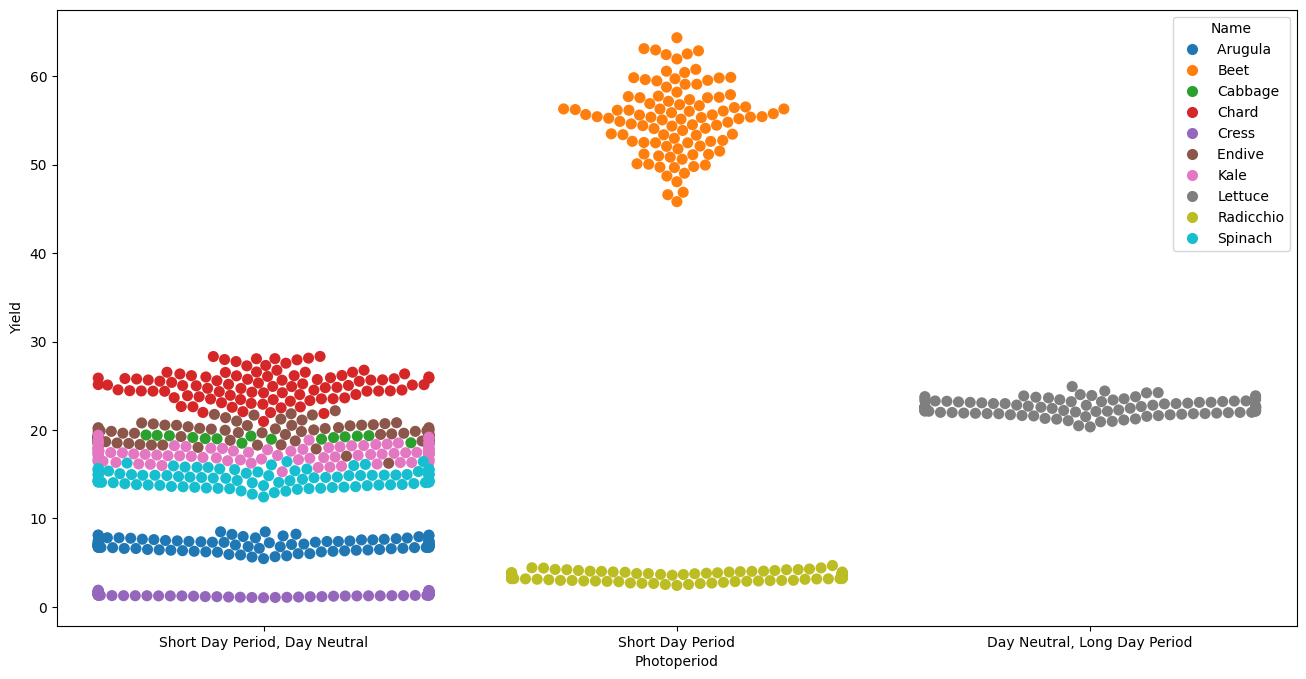

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="Photoperiod", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 89.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 55.0% of the points cannot be plac

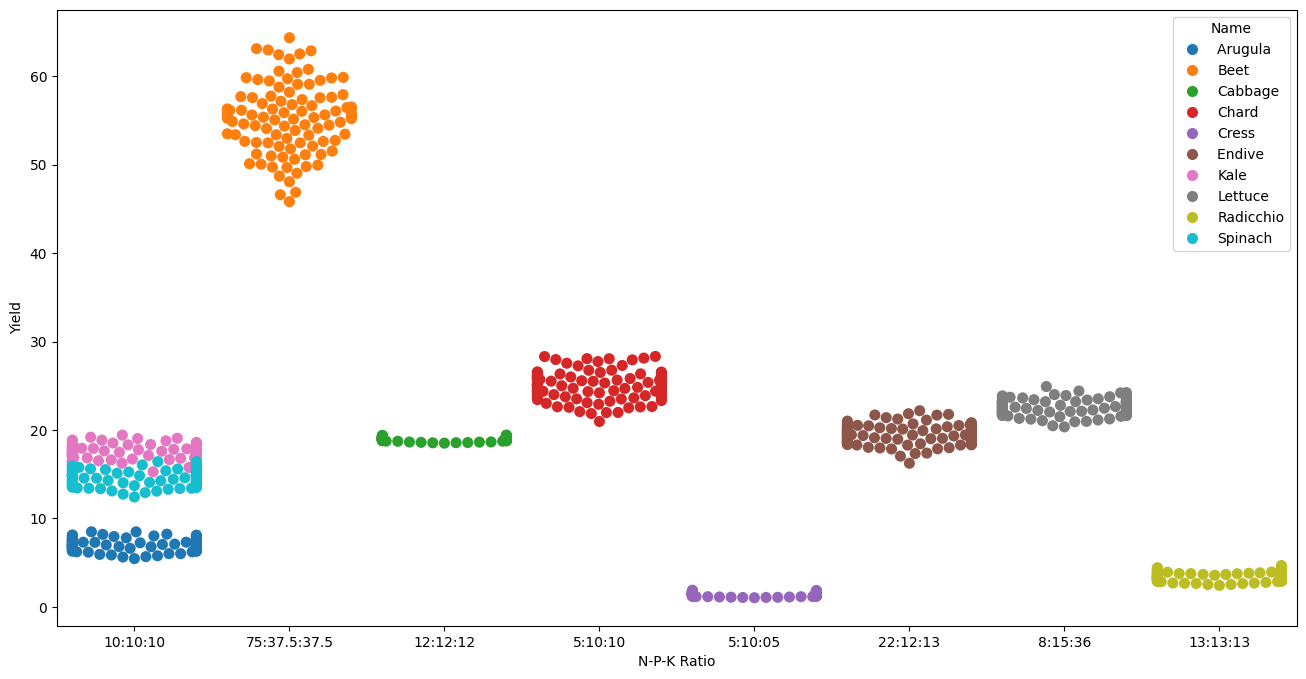

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
sns.swarmplot(x ="N-P-K Ratio", y = "Yield", hue='Name',
              data = df, size = 8)
plt.show()

<Figure size 1600x1000 with 0 Axes>

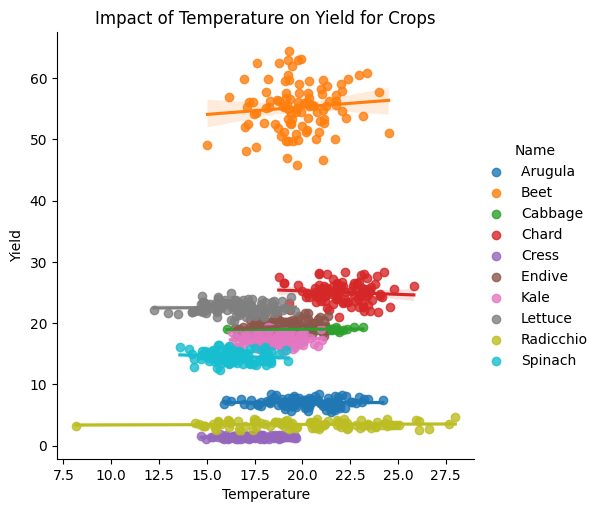

<Figure size 1600x1000 with 0 Axes>

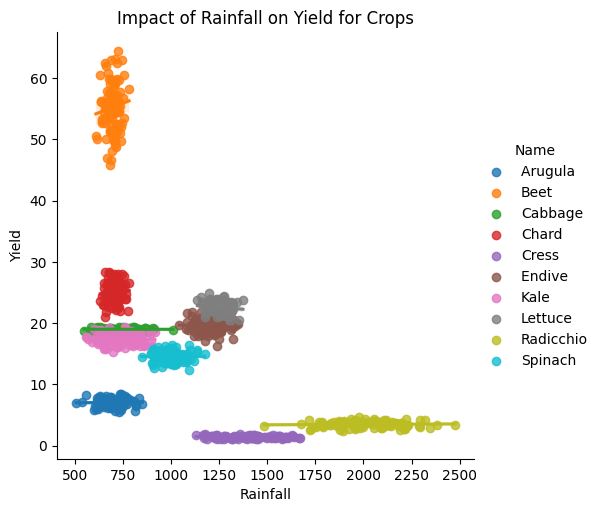

<Figure size 1600x1000 with 0 Axes>

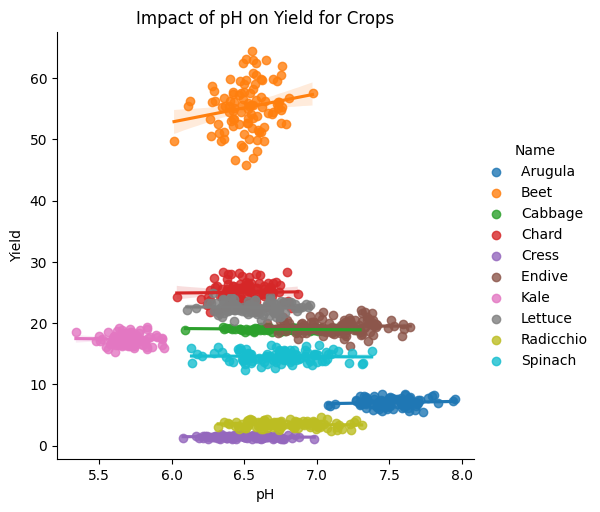

<Figure size 1600x1000 with 0 Axes>

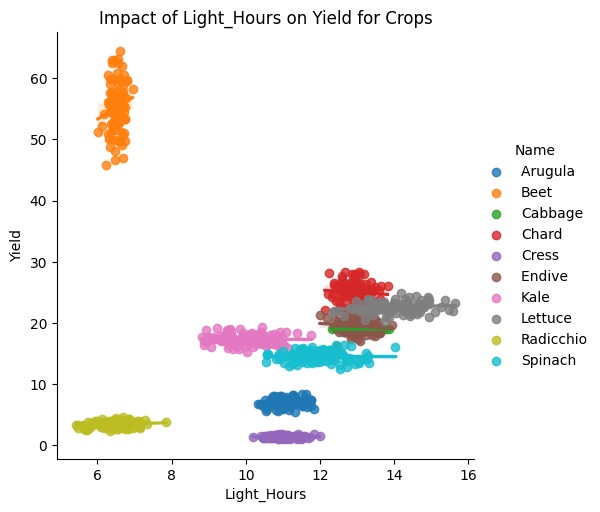

<Figure size 1600x1000 with 0 Axes>

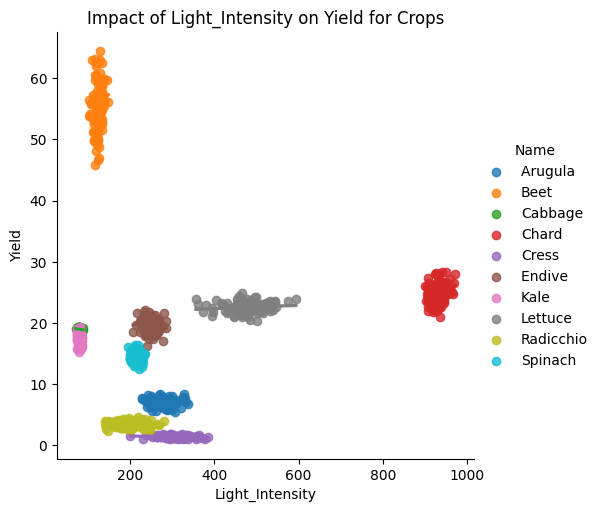

<Figure size 1600x1000 with 0 Axes>

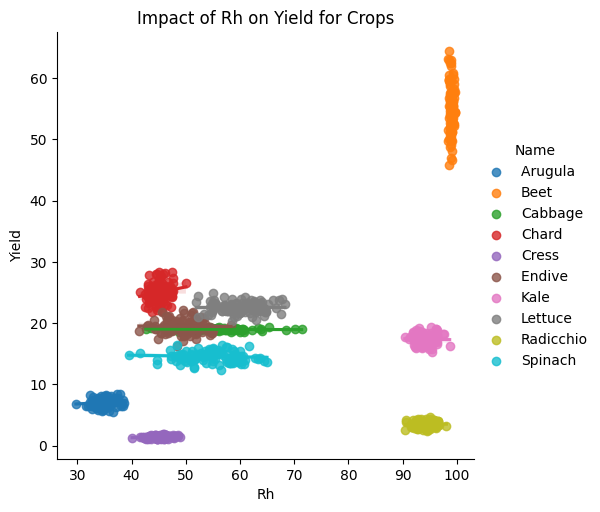

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float'])
for col in numerical_columns:
    if col != 'Yield':
      # Set the width and height of the figure
      plt.figure(figsize=(16,10))
      #  Influence of each feature on Crop Yield
      sns.lmplot(x=col, y='Yield', hue='Name', data=df, height=5)
      # Add title
      plt.title(f"Impact of {col} on Yield for Crops")
      plt.xlabel(f"{col}")
      plt.ylabel('Yield')
      plt.show()


## Observations based on the above plots


1. Impact of Temperature on Crop Yield

    *   Beets provide higher yield when the temperatures are around 15-25 degrees Celsius
    


2. Impact of Rainfall on Crop Yield

    *  Radicchio need higher rainfall for optimum yield whereas Beets are observed to yield high even when the rainfall is less

3. Impact of Soil pH on Crops and its yield

    * Most salads need soil pH of between 5.5 - 7.5 for its optimum yield


4. Impact of Light Hours on different crops and its yield

    * Radichhio and Beets need lower light hours compared to other salad crops


5. Impact of Light Intensity on Crops and its Yield

    * Lettuce needs 400-600 Light intensity whereas Chard needs around 900-1000 whereas all other salad crops need lower light intensity for its optimum yield



6. Impact of Relative Humidity (RH) on Crops and its Yield

    * Radicchio, Kale and Beets need higher Humidity levels for producing optimum yield



Text(0, 0.5, 'Yield')

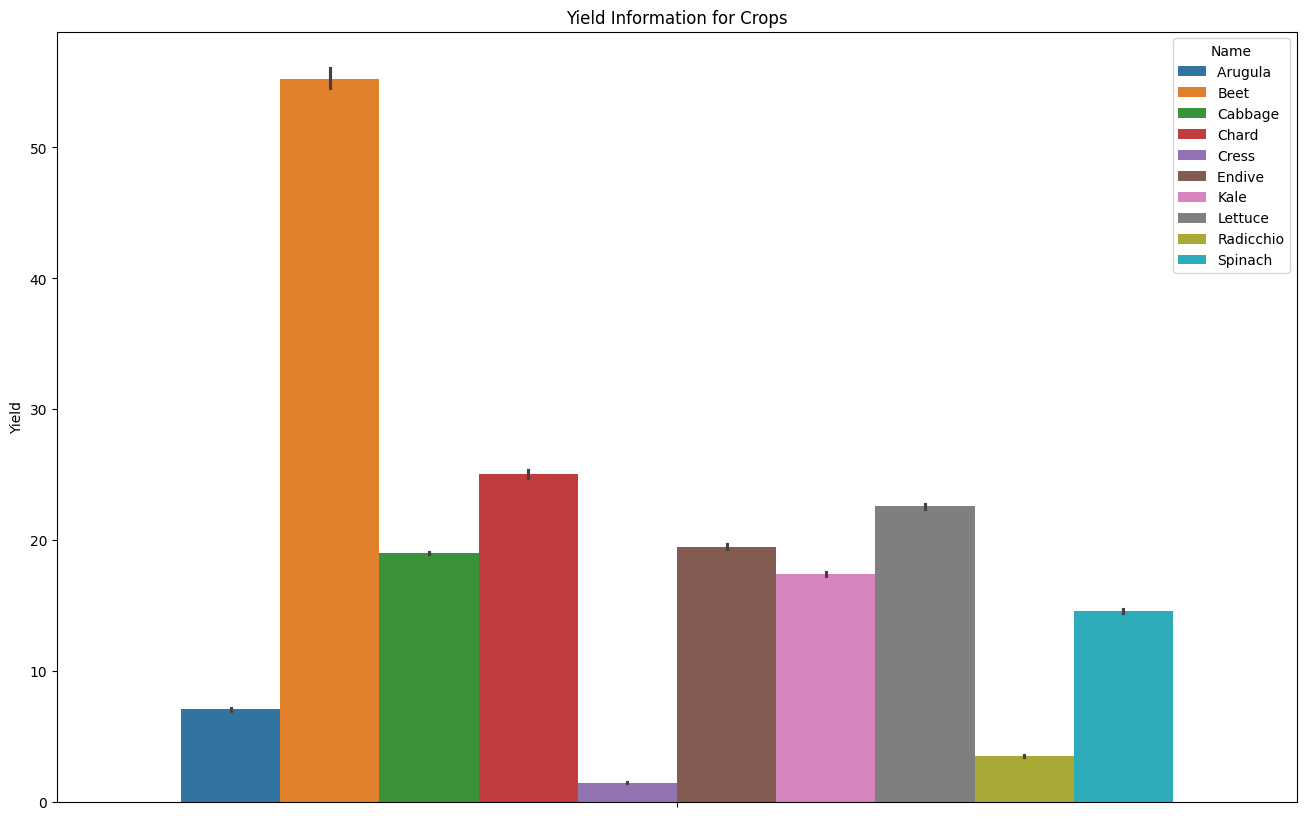

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(16,10))

# Add title
plt.title("Yield Information for Crops")

# Bar chart showing Yield details for different crops
sns.barplot(data=df, y=df['Yield'], hue='Name')

# Add label for vertical axis
plt.ylabel("Yield")

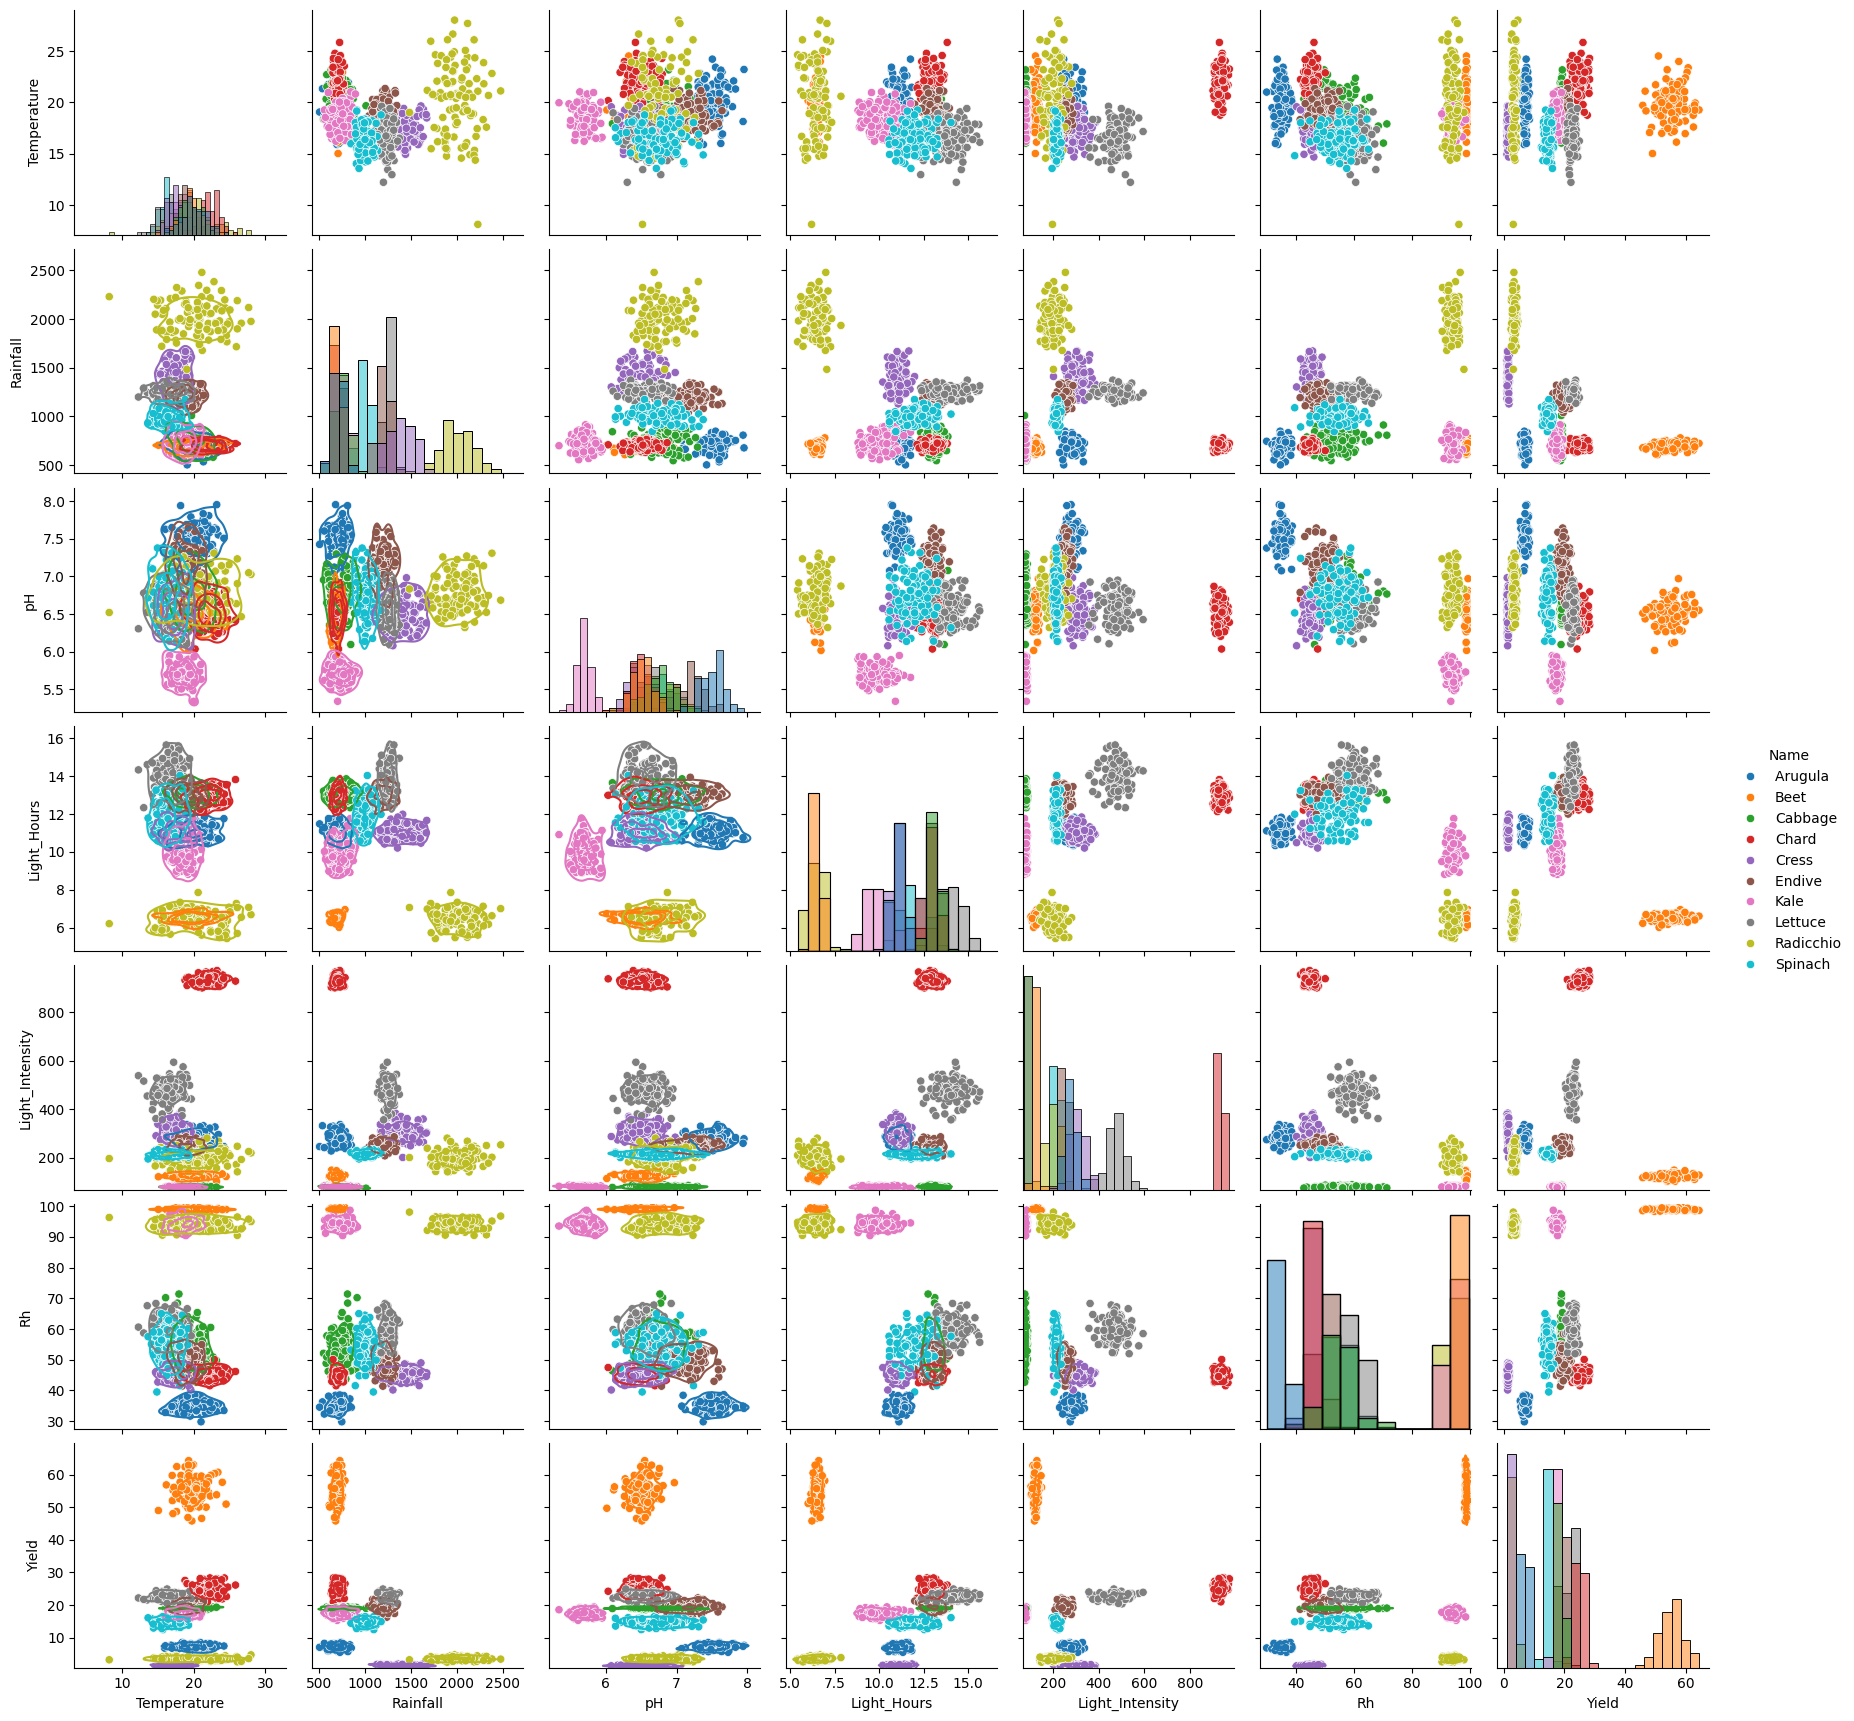

In [ ]:
# sns.pairplot(df, hue="Name", diag_kind="hist")

g = sns.pairplot(df, hue='Name', diag_kind="hist")
g.map_lower(sns.kdeplot, levels=4, color=".2")

## To understand how well the features are related

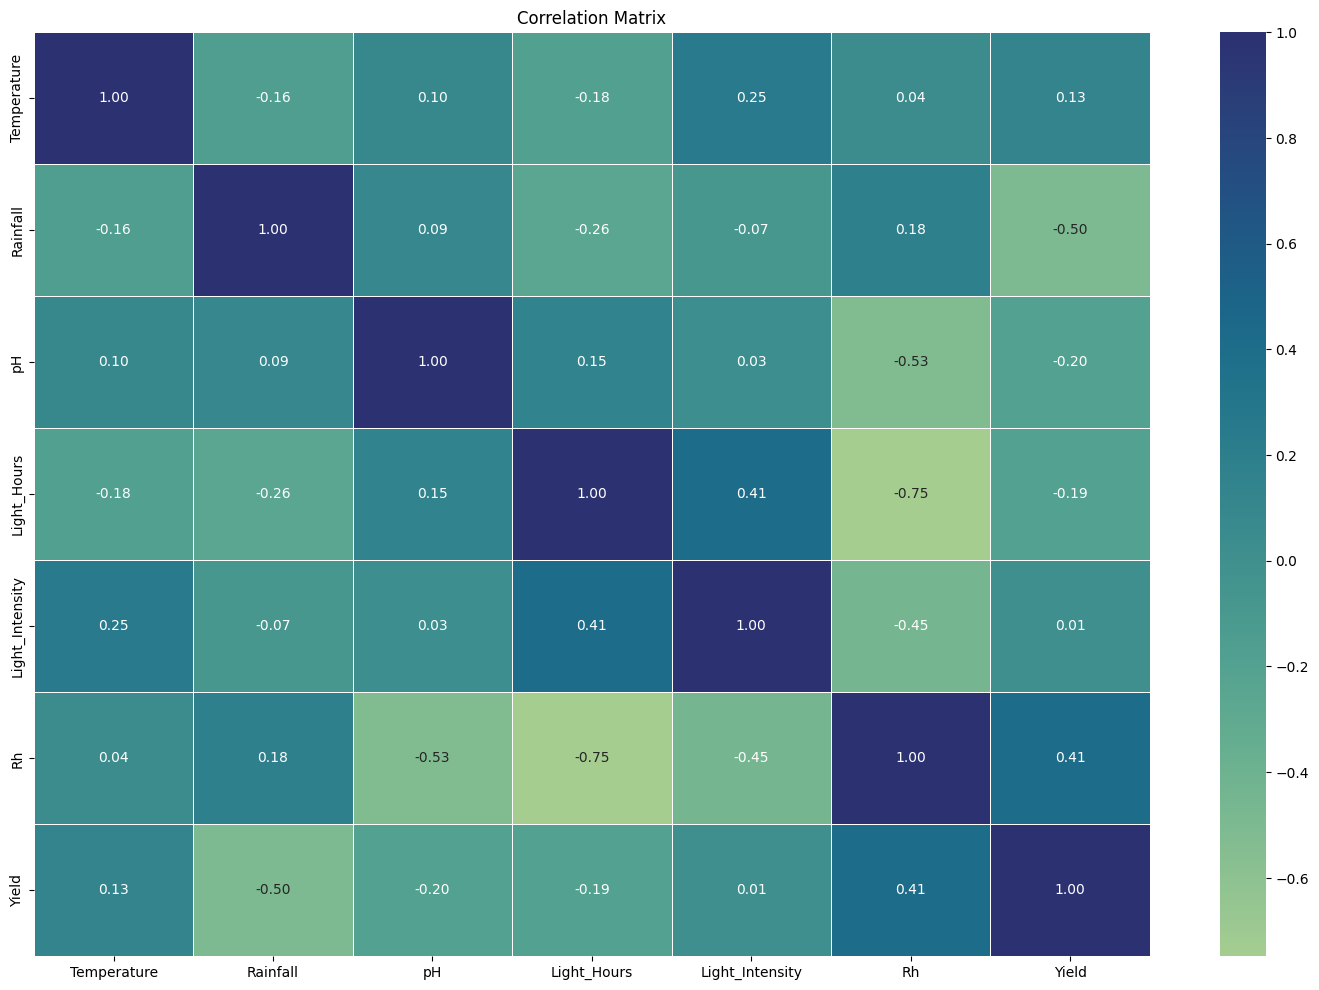

In [ ]:
# Correlation matrix for numerical variables
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

# # Create a mask using numpy's triu function
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Based on the Corelation matrix, we observe that there is
  * positive, but not so strong corelation between RH and yield
  * positive, but not so strong corelation between Light Intensity and Light Hours


## Yield Information for different Crops across Seasons

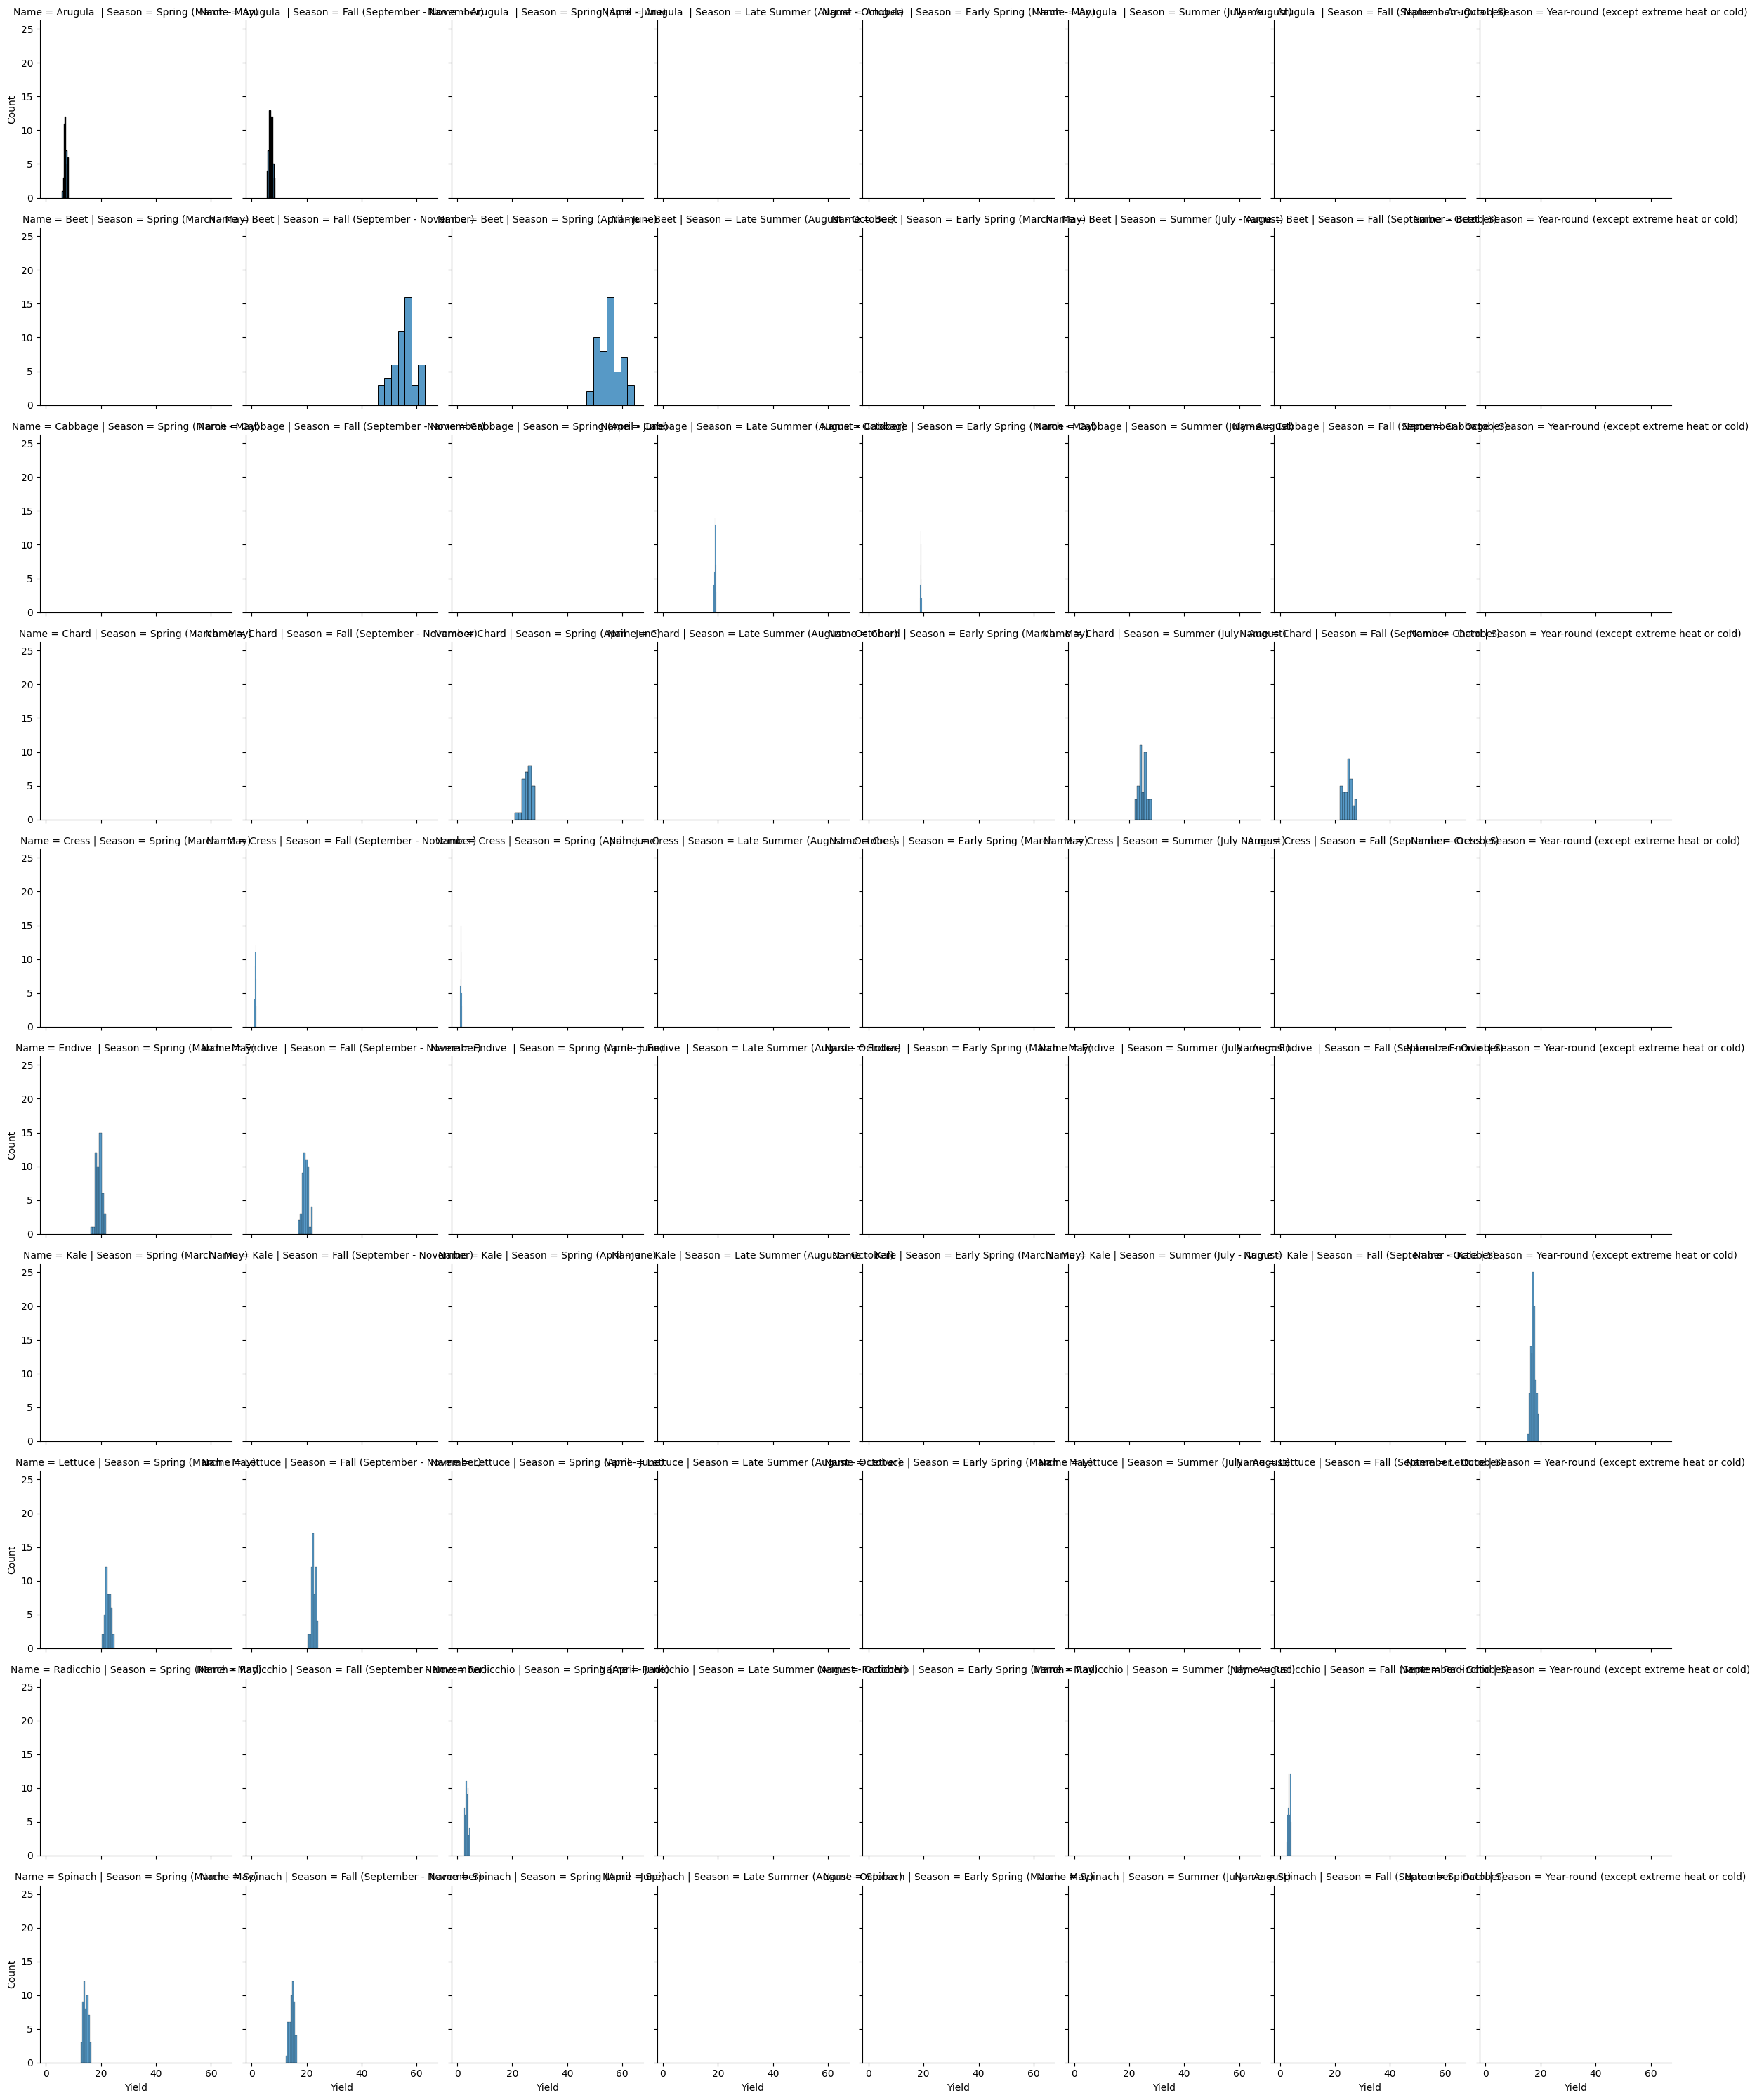

In [ ]:
g = sns.FacetGrid(df, col="Season",  row="Name")
g.map_dataframe(sns.histplot, x="Yield")

## Based on the above plots, we observe that
* Radicchio, Lettuce, Spinach, Endive and Arugula yield is high during Fall and Spring

## Box Plot to Identify Outliers in Numerical Features

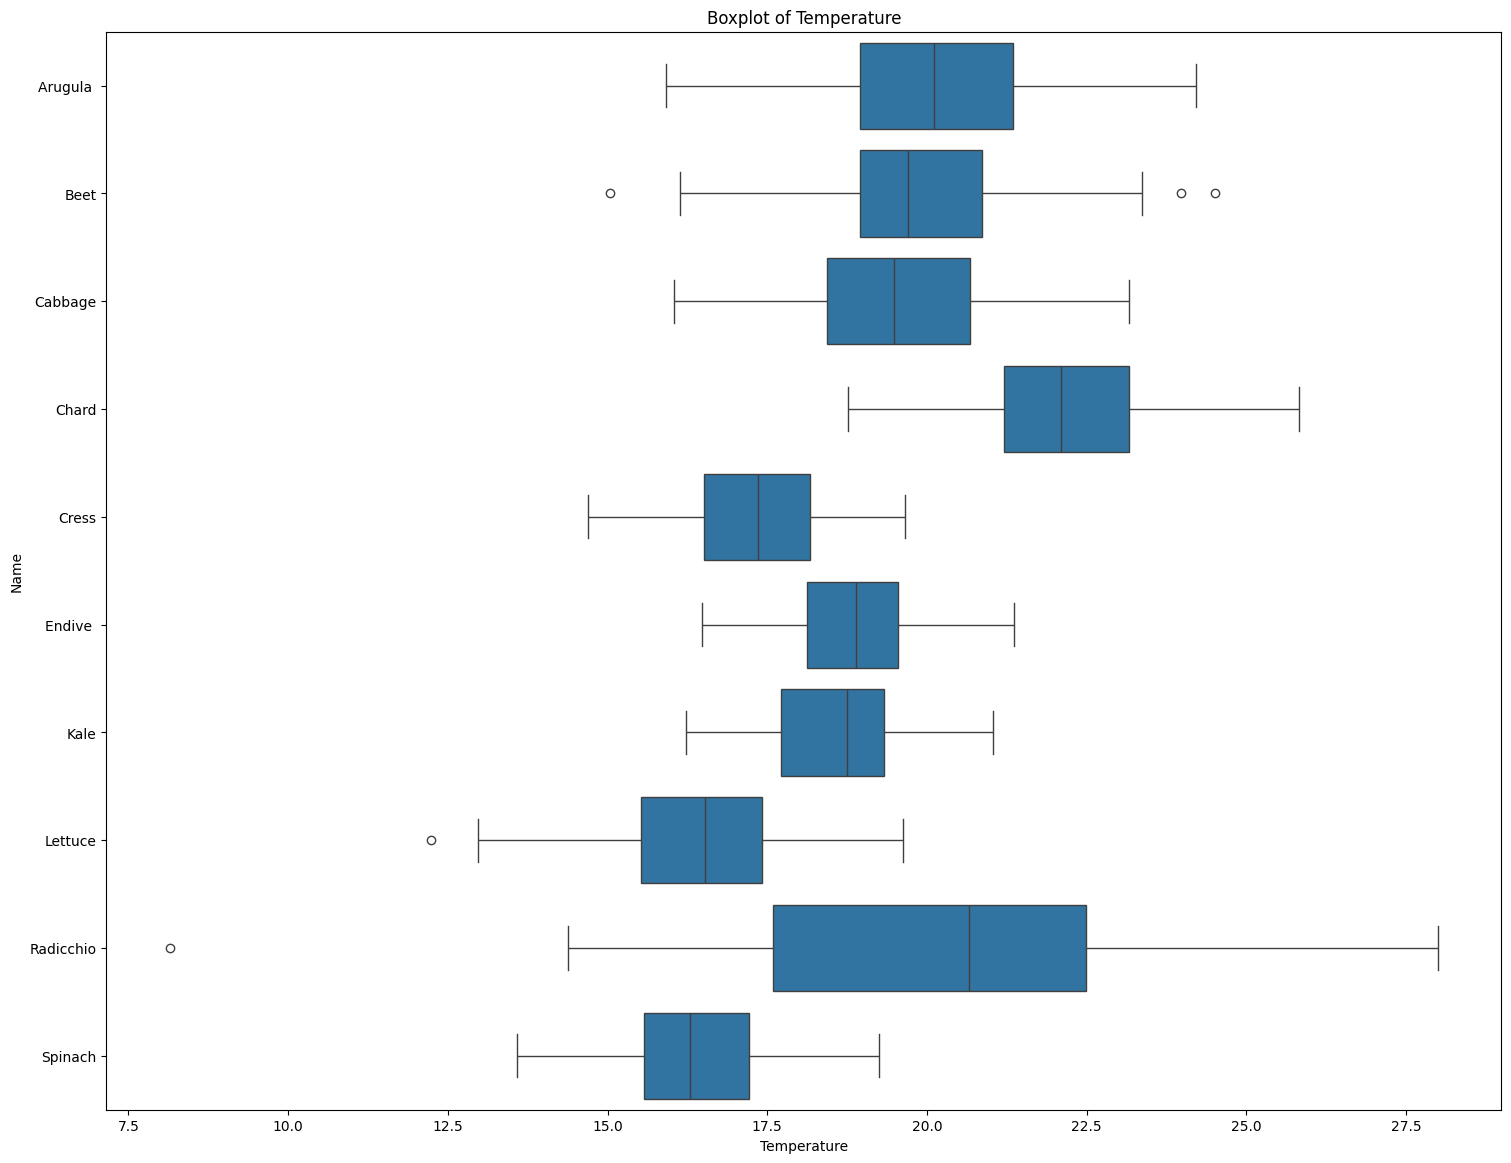

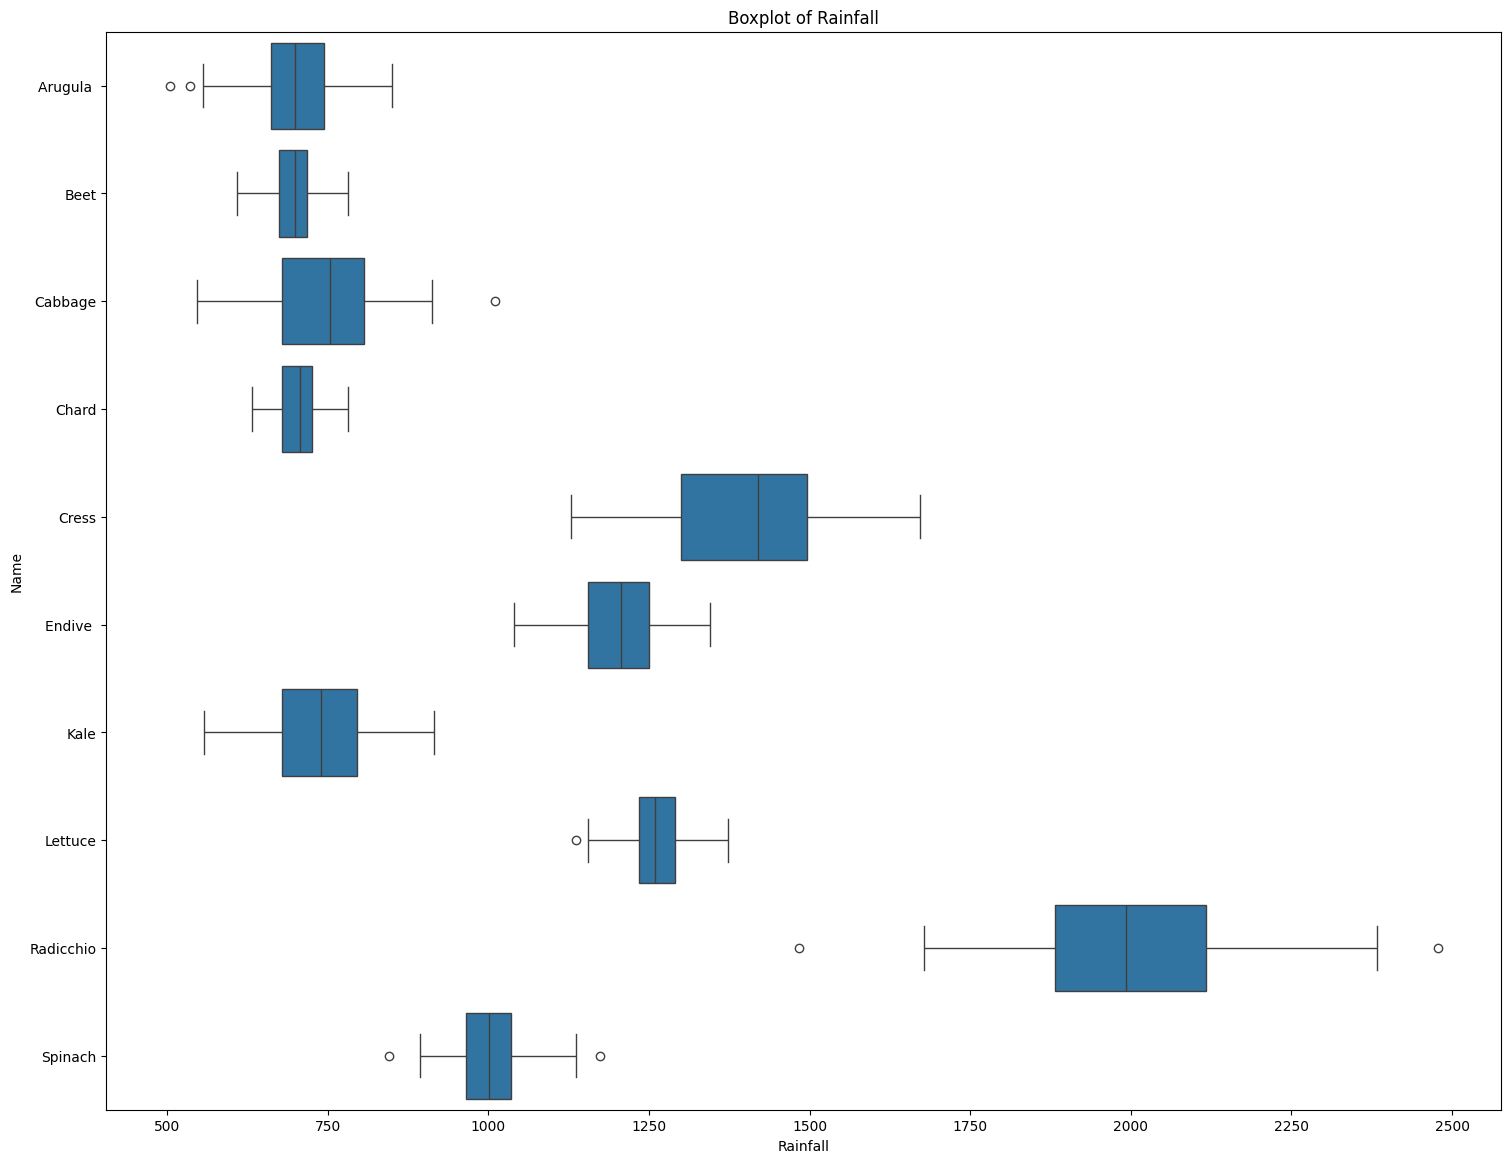

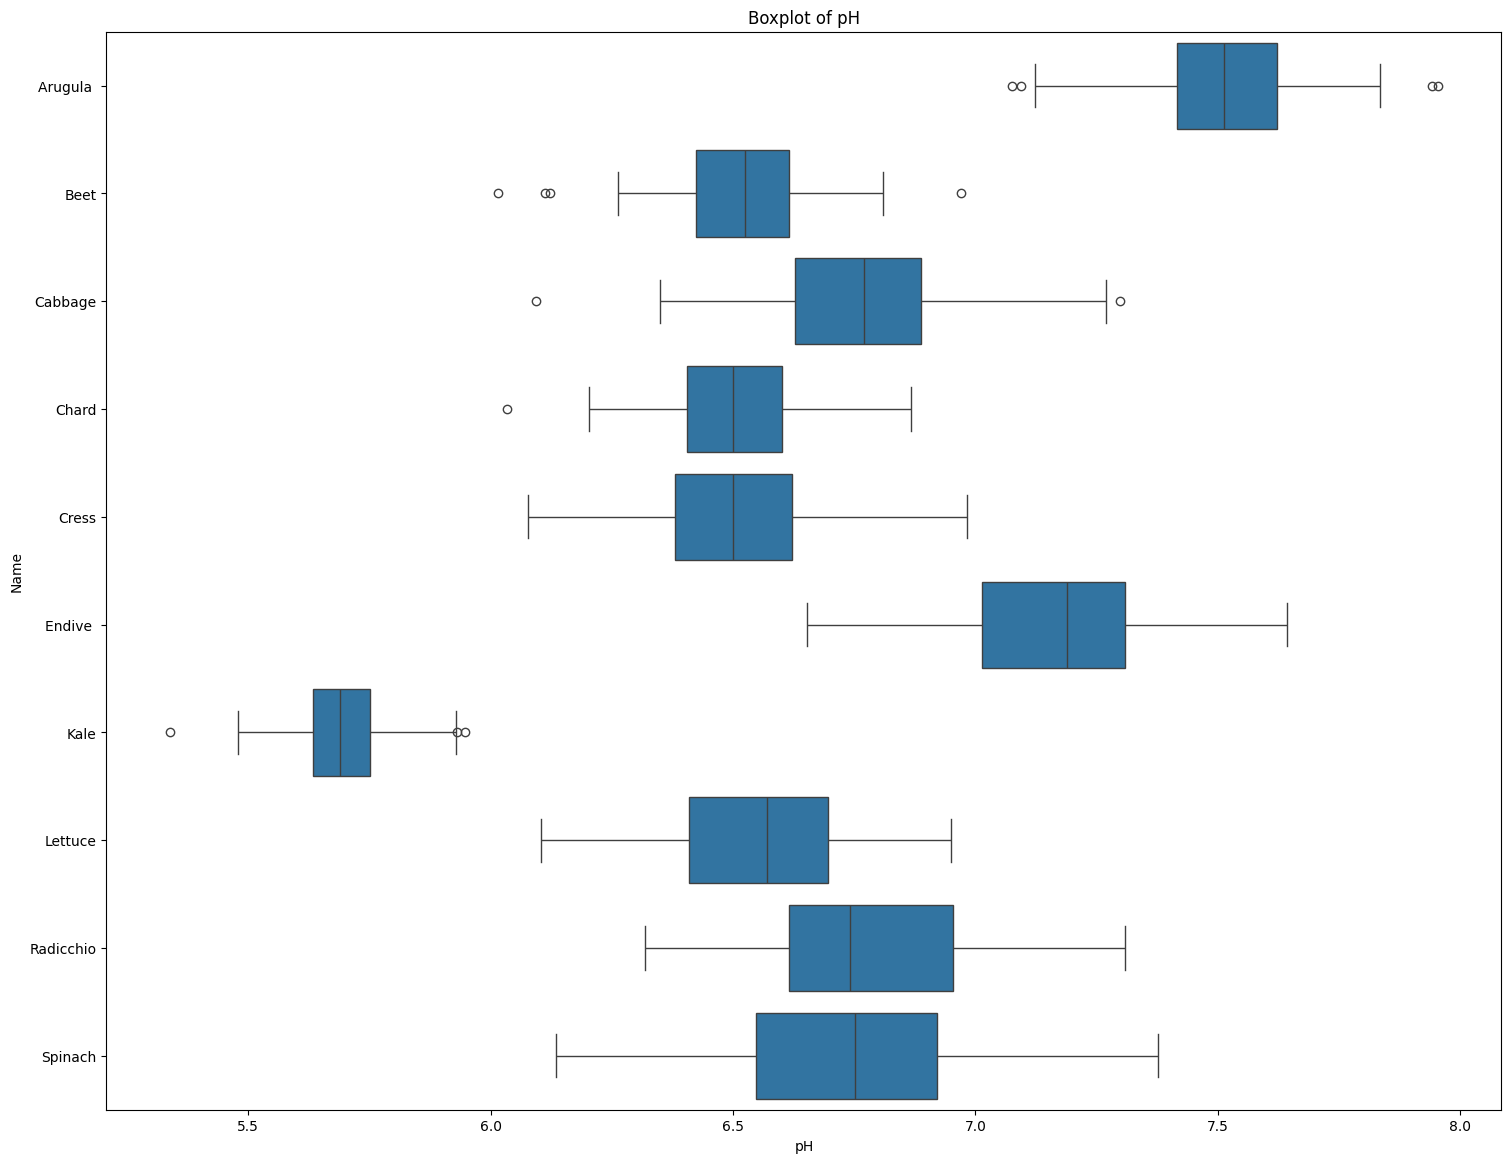

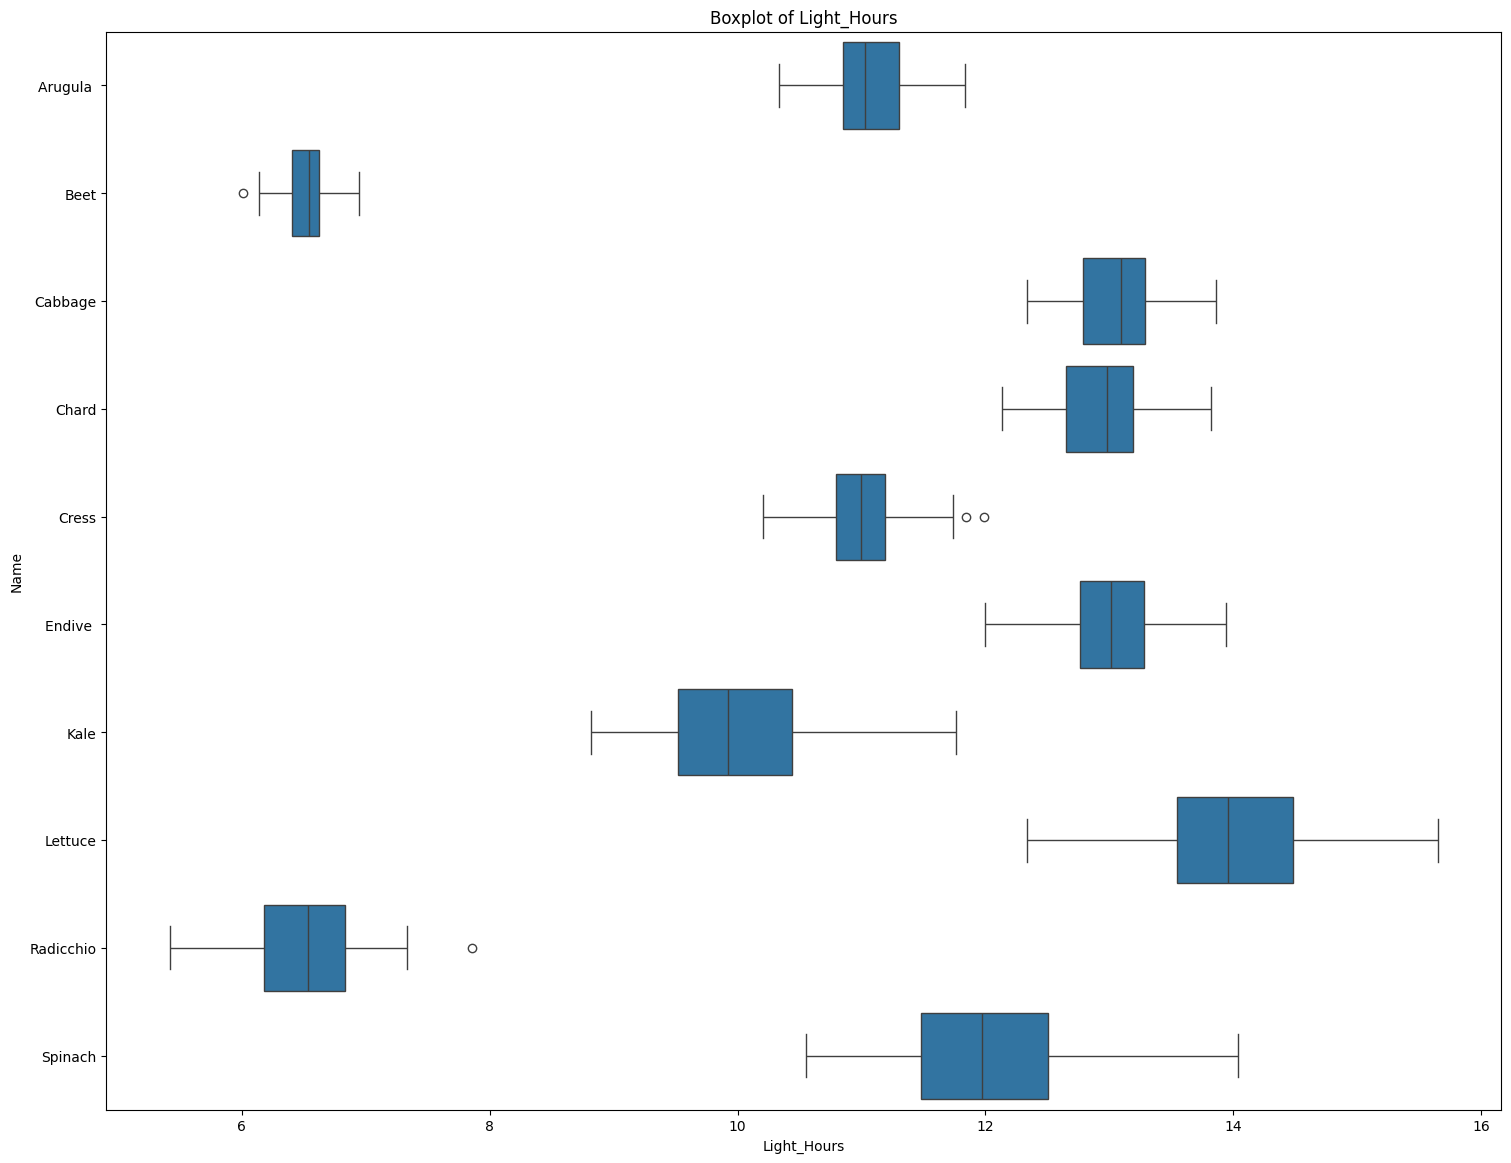

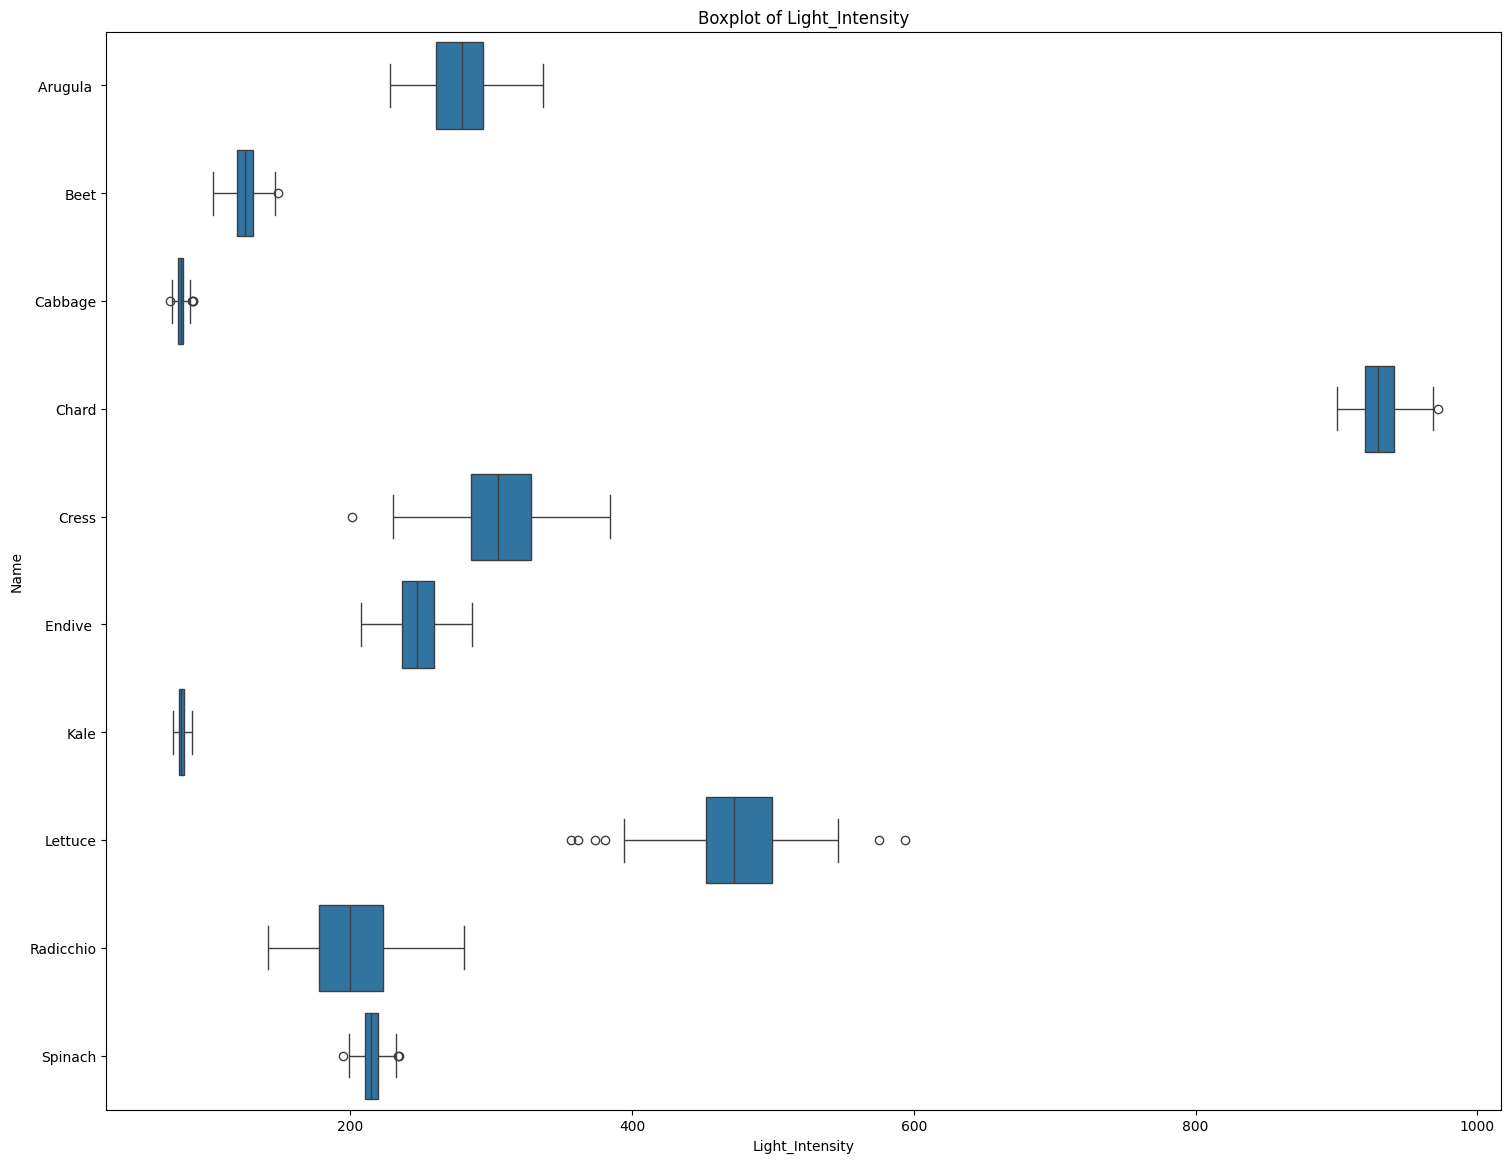

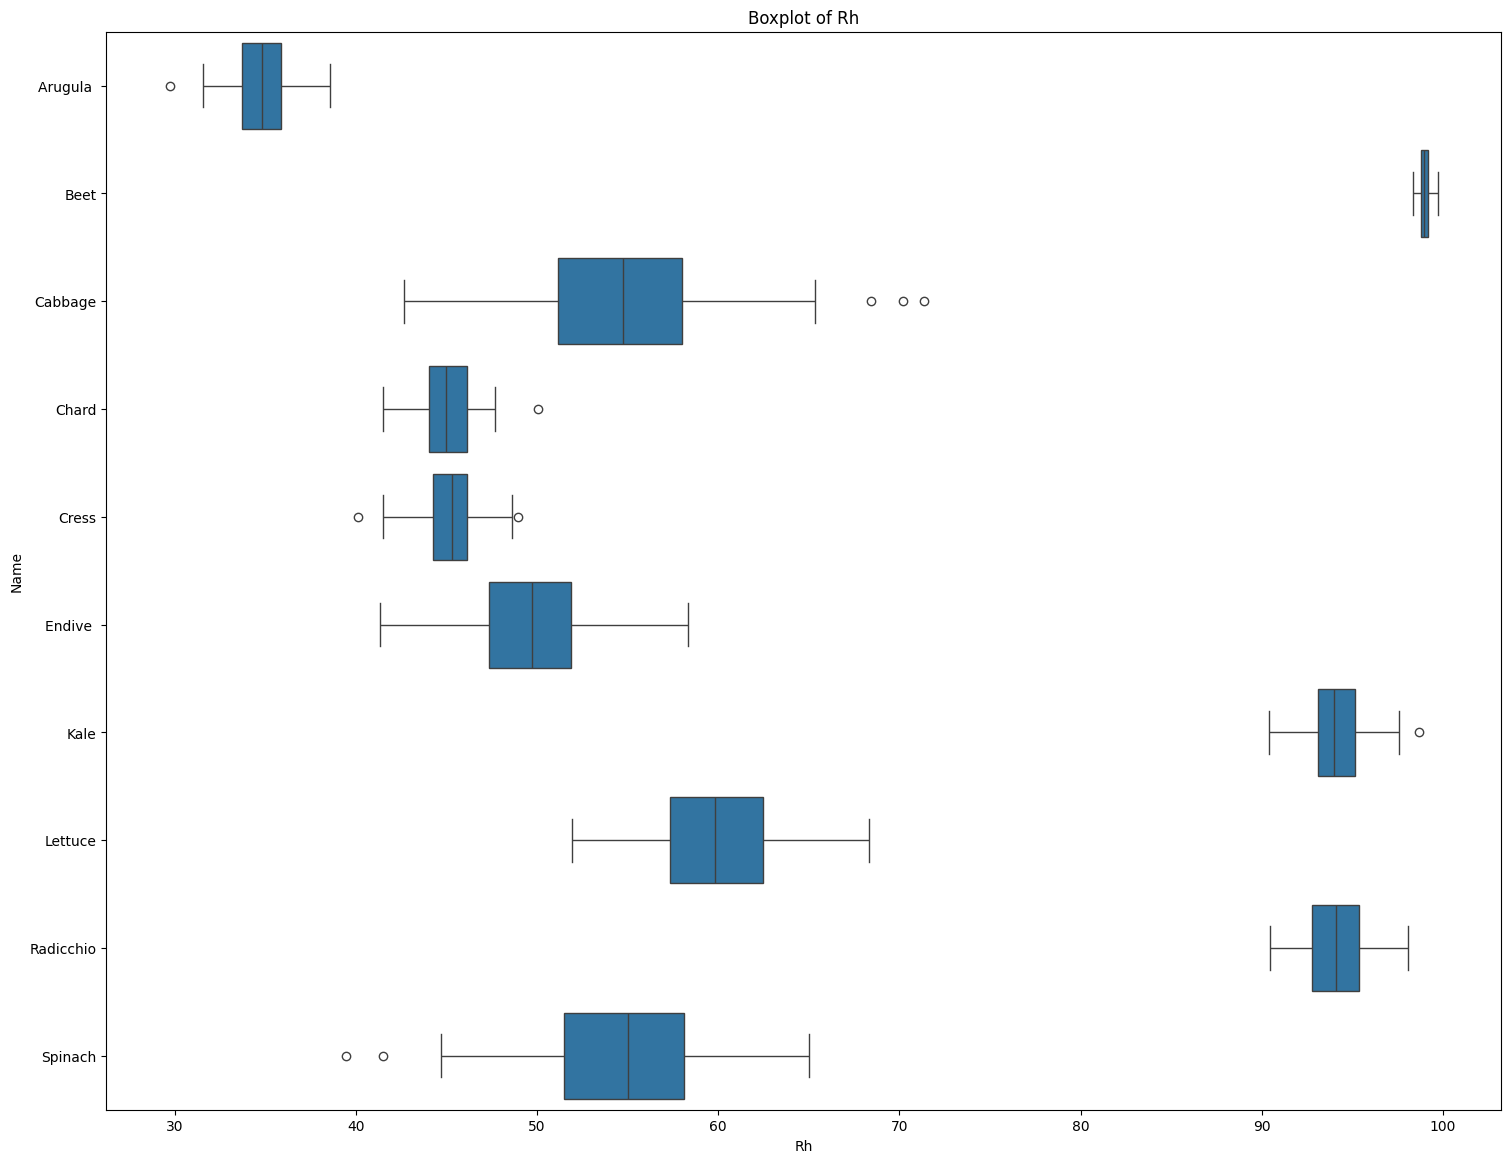

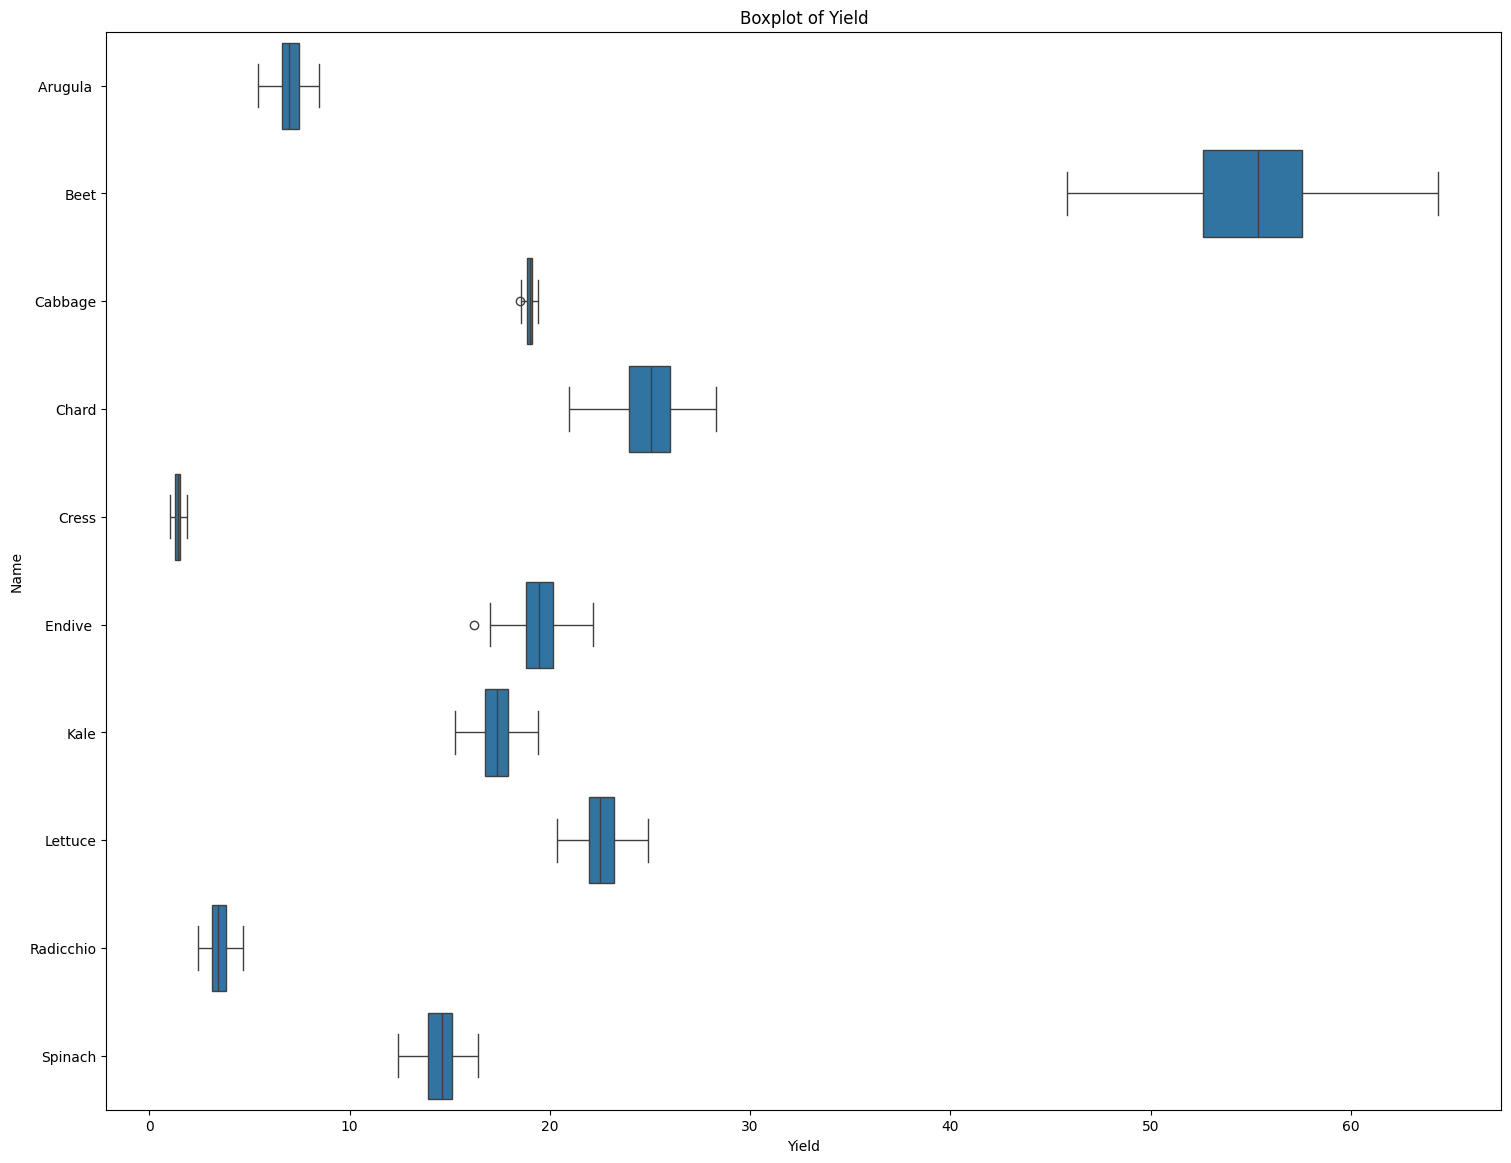

,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield,Season,Temperature_zscore,Rainfall_zscore,pH_zscore,Light_Hours_zscore,Light_Intensity_zscore,Rh_zscore,Yield_zscore
0,Arugula,"Loose fertile loams, and muck soilsÂ",Moderate,"Short Day Period, Day Neutral",10:10:10,18.266840,662.120313,7.608519,11.429354,286.969396,33.673726,7.112711,Spring (March - May),10.398029,659.615763,-6.065374,7.144374,285.750549,30.870296,5.833988
1,Arugula,"Loose fertile loams, and muck soilsÂ",Moderate,"Short Day Period, Day Neutral",10:10:10,20.037084,714.855198,7.668789,10.765270,303.546727,38.598772,6.966279,Fall (September - November),12.168273,712.350648,-6.005105,6.480290,302.327880,35.795342,5.687556
2,Arugula,"Loose fertile loams, and muck soilsÂ",Moderate,"Short Day Period, Day Neutral",10:10:10,21.602393,618.230697,7.483352,10.995465,290.993398,34.996170,6.008725,Fall (September - November),13.733582,615.726147,-6.190541,6.710486,289.774551,32.192740,4.730002
3,Arugula,"Loose fertile loams, and muck soilsÂ",Moderate,"Short Day Period, Day Neutral",10:10:10,23.202764,678.165166,7.953914,10.688723,278.432150,34.115822,7.596081,Fall (September - November),15.333953,675.660616,-5.719979,6.403743,277.213302,31.312392,6.317358
4,Arugula,"Loose fertile loams, and muck soilsÂ",Moderate,"Short Day Period, Day Neutral",10:10:10,22.826845,685.069498,7.329662,10.758509,274.792376,35.642448,6.911925,Spring (March - May),14.958034,682.564948,-6.344231,6.473529,273.573529,32.839018,5.633202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Spinach,well-drained soil rich in organic matter,High,"Short Day Period, Day Neutral",10:10:10,18.099412,1032.206928,6.370425,11.567302,211.145168,58.860261,14.419834,Fall (September - November),10.230601,1029.702378,-7.303468,7.282323,209.926321,56.056831,13.141110
996,Spinach,well-drained soil rich in organic matter,High,"Short Day Period, Day Neutral",10:10:10,19.157696,908.863872,6.921008,11.579494,209.147918,54.842923,15.596829,Fall (September - November),11.288885,906.359322,-6.752885,7.294515,207.929071,52.039493,14.318106
997,Spinach,well-drained soil rich in organic matter,High,"Short Day Period, Day Neutral",10:10:10,18.014042,993.105073,6.514205,11.487107,216.661153,54.374976,15.765712,Fall (September - November),10.145231,990.600523,-7.159688,7.202128,215.442305,51.571546,14.486988
998,Spinach,well-drained soil rich in organic matter,High,"Short Day Period, Day Neutral",10:10:10,16.389142,998.851110,6.813322,11.756076,201.686919,47.084233,15.643429,Fall (September - November),8.520331,996.346560,-6.860571,7.471096,200.468072,44.280803,14.364705


In [ ]:
# Plot to detect Outliers and also Calculate the ZScores
for col in numerical_columns:
    col_zscore = col + "_zscore"
    df[col_zscore] = df[col] - df[col].mean()/df[col].std(ddof=0)
    plt.figure(figsize=(18, 14))
    sns.boxplot(data=df, x=col, y='Name')
    plt.title(f'Boxplot of {col}')
    plt.show()


df


## There are some outliers observed for almost all features for different crops, handling of outliers need to be further analysed

## Analyse Corelation between features and target(Yield)

In [ ]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    df[col] = df[col].astype('category').cat.codes


# Corelation between Yield and all other features
df[df.columns[1:]].corr()['Yield'][:]

Soil_Type                 0.492889
Fertility                -0.338904
Photoperiod              -0.309672
N-P-K Ratio               0.517623
Temperature               0.133611
Rainfall                 -0.500995
pH                       -0.200428
Light_Hours              -0.194896
Light_Intensity           0.013406
Rh                        0.409069
Yield                     1.000000
Season                   -0.020838
Temperature_zscore        0.133611
Rainfall_zscore          -0.500995
pH_zscore                -0.200428
Light_Hours_zscore       -0.194896
Light_Intensity_zscore    0.013406
Rh_zscore                 0.409069
Yield_zscore              1.000000
Name: Yield, dtype: float64

* There is positive corelation between Yield and Soil Type , NPK ratio